<a href="https://colab.research.google.com/github/kalambepranit/SLR/blob/main/Assignment_1_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [ ]:
delivery_time = pd.read_csv("/content/delivery_time.csv")
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
delivery_time.columns = ['deliverytime','sortingtime' ]
delivery_time.head()

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# INDEPENDENT AND DEPENDENT VARIABLE

In [ ]:
X = delivery_time.iloc[:,0].values
Y = delivery_time.iloc[:,1].values

In [ ]:
X

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [ ]:
Y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [ ]:
# In this data, there is no any missing data.
# Here only single independent variable so no  need to do feature scaling. 

# Correlation

In [ ]:
delivery_time.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

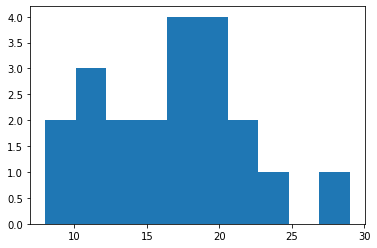

In [ ]:
plt.hist(delivery_time['deliverytime'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

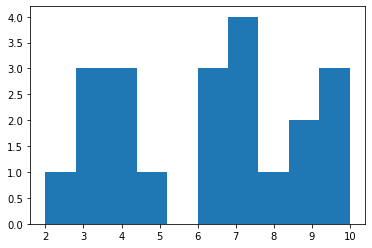

In [ ]:
plt.hist(delivery_time['sortingtime'])

# FITTING A LINEAR REGRESSION MODEL

In [ ]:
import statsmodels.formula.api as smf
model =smf.ols('deliverytime~sortingtime', data = delivery_time).fit()

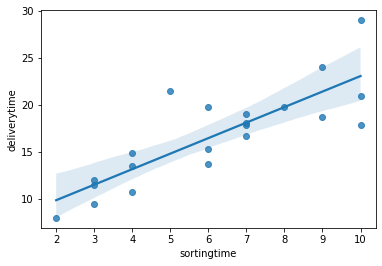

In [ ]:
import seaborn as sns
sns.regplot(x='sortingtime', y='deliverytime', data=delivery_time)

#COEFFICIENTS

In [ ]:
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

# T & P VALUES

In [ ]:
print(model.tvalues, '\n', model.pvalues)   

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


# R SQUARED VALUE

In [ ]:
  (model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# PREDICT FOR NEW DATA POINTS

In [ ]:
newdata=pd.Series([5,7])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sortingtime'])

In [ ]:
model.predict(data_pred)

0    14.827833
1    18.125873
dtype: float64

# Transforming Data in Log
# New Section



In [ ]:
Delivery_log = np.log(delivery_time)
Delivery_log.head()

,deliverytime,sortingtime
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


# Correlation

In [ ]:
Delivery_log.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.878727
sortingtime,0.878727,1.000000


(array([1., 0., 3., 0., 3., 1., 3., 4., 1., 5.]),
 array([0.69314718, 0.85409097, 1.01503476, 1.17597855, 1.33692235,
        1.49786614, 1.65880993, 1.81975372, 1.98069751, 2.1416413 ,
        2.30258509]),
 <a list of 10 Patch objects>)

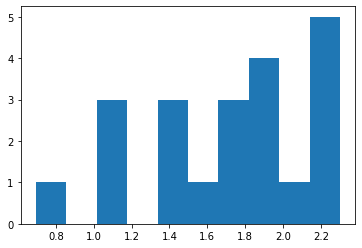

In [ ]:
plt.hist(Delivery_log['sortingtime'])

(array([1., 1., 2., 1., 3., 2., 5., 4., 1., 1.]),
 array([2.07944154, 2.20822697, 2.3370124 , 2.46579783, 2.59458326,
        2.72336869, 2.85215411, 2.98093954, 3.10972497, 3.2385104 ,
        3.36729583]),
 <a list of 10 Patch objects>)

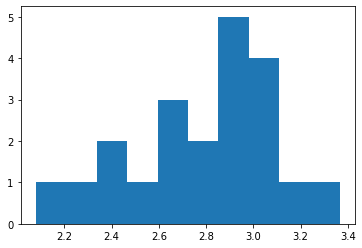

In [ ]:
plt.hist(Delivery_log['deliverytime'])

# Fitting a Linear Regression Model

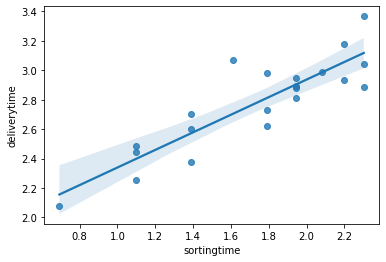

In [ ]:
import statsmodels.formula.api as smf
model =smf.ols('deliverytime~sortingtime', data = Delivery_log).fit()
sns.regplot(x='sortingtime', y='deliverytime', data=Delivery_log)

# Coefficients

In [ ]:
model.params

Intercept      1.741987
sortingtime    0.597522
dtype: float64

# T and P Value

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept      13.085552
sortingtime     8.024484
dtype: float64 
 Intercept      5.921137e-11
sortingtime    1.601539e-07
dtype: float64


# R squared value

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

# Prediction for new data

In [ ]:
newdata=pd.Series([3.256,4.256])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sortingtime'])

In [ ]:
model.predict(data_pred)

0    3.687520
1    4.285042
dtype: float64